Expectation value of I: 0.9999999999999998
Expectation value of X: 0.9999999999999998
Expectation value of Y: 0.0
Expectation value of Z: 0.0


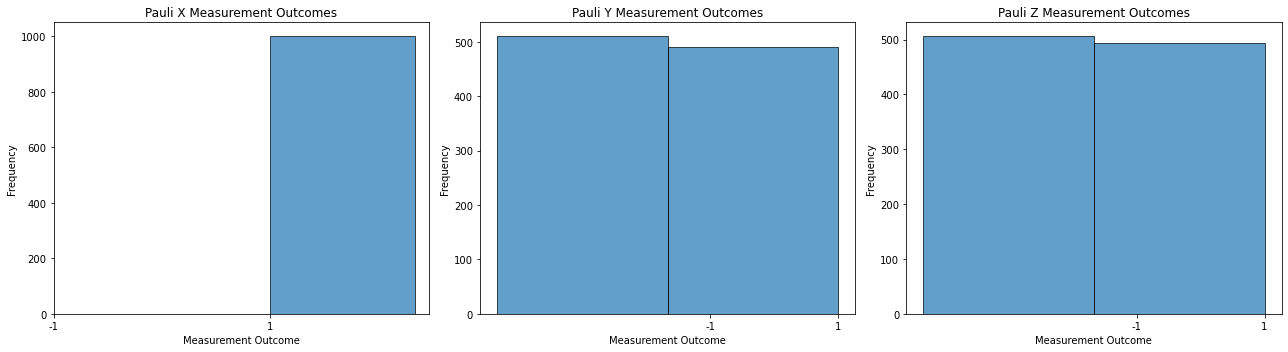

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Qubit sisteminde temel durumları tanımla |0> ve |1>
basis0 = basis(2, 0)
basis1 = basis(2, 1)

# Ölçülecek durumu tanımla (|0> + |1>)/√2
state = (basis0 + basis1).unit()

# Yoğunluk matrisini oluştur
density_matrix = ket2dm(state)

# İz operatörleri (Pauli matrisleri)
I = qeye(2)  # Kimlik matrisi
X = sigmax()  # Pauli X matrisi
Y = sigmay()  # Pauli Y matrisi
Z = sigmaz()  # Pauli Z matrisi

# İz operatörlerinin beklenti değerlerini hesapla
expect_I = expect(I, density_matrix)
expect_X = expect(X, density_matrix)
expect_Y = expect(Y, density_matrix)
expect_Z = expect(Z, density_matrix)

# Sonuçları yazdır
print("Expectation value of I:", expect_I)
print("Expectation value of X:", expect_X)
print("Expectation value of Y:", expect_Y)
print("Expectation value of Z:", expect_Z)

# Monte Carlo simülasyonu için ölçüm sayısını belirle
num_measurements = 1000
X_results = []
Y_results = []
Z_results = []

# Ölçümleri gerçekleştir ve sonuçları kaydet
for _ in range(num_measurements):
    X_results.append(np.random.choice([1, -1], p=[(1 + expect_X) / 2, (1 - expect_X) / 2]))
    Y_results.append(np.random.choice([1, -1], p=[(1 + expect_Y) / 2, (1 - expect_Y) / 2]))
    Z_results.append(np.random.choice([1, -1], p=[(1 + expect_Z) / 2, (1 - expect_Z) / 2]))

# Histogramları çiz
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(X_results, bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0.25, 1.0], ['-1', '1'])
plt.xlabel('Measurement Outcome')
plt.ylabel('Frequency')
plt.title('Pauli X Measurement Outcomes')

plt.subplot(1, 3, 2)
plt.hist(Y_results, bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0.25, 1.0], ['-1', '1'])
plt.xlabel('Measurement Outcome')
plt.ylabel('Frequency')
plt.title('Pauli Y Measurement Outcomes')

plt.subplot(1, 3, 3)
plt.hist(Z_results, bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0.25, 1.0], ['-1', '1'])
plt.xlabel('Measurement Outcome')
plt.ylabel('Frequency')
plt.title('Pauli Z Measurement Outcomes')

plt.tight_layout()
plt.show()
